In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

In [5]:
bcan=pd.read_csv(r"...\data.csv")

In [6]:
bcan.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [7]:
slc=bcan.iloc[:,2:32]
print(type(slc))
slc.head()

<class 'pandas.core.frame.DataFrame'>


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
bcr=bcan.diagnosis
bcr.head()

0    M
1    M
2    M
3    M
4    M
Name: diagnosis, dtype: object

In [9]:
bcd=pd.get_dummies(bcr)
bcd.head()

,B,M
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [10]:
bcm=bcd.M
bcm.head()

0    1
1    1
2    1
3    1
4    1
Name: M, dtype: uint8

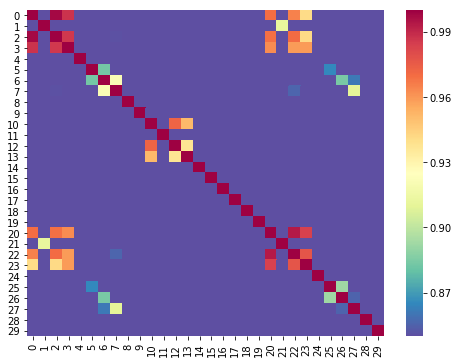

In [18]:
#identifying collinearity
import pandas as pd
import numpy as np
bccor=np.corrcoef(slc.T)
type(bccor)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(8,6))
sns.heatmap(bccor, vmin=0.85, vmax=1,\
            cmap=plt.cm.Spectral_r)

In [42]:
#PCA for dimensional reduction
#PCA on standard/scaled data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
slc_scaled=scaler.fit_transform(slc)

In [43]:
pca=PCA(n_components=.95)
x_pca=pca.fit_transform(slc_scaled)
print(x_pca.shape)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())
loadings=pca.components_

(569, 10)
[0.44272026 0.18971182 0.09393163 0.06602135 0.05495768 0.04024522
 0.02250734 0.01588724 0.01389649 0.01168978]
0.9515688143366667


In [44]:
#PCA after removing collinear variables
slc_scaled=pd.DataFrame(slc_scaled)
xx=slc_scaled.drop(slc_scaled.columns[[2,3,22,12,13]],axis=1)
pca=PCA(n_components=.95)
x_pca=pca.fit_transform(xx)
print(x_pca.shape)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())
loadings=pca.components_

(569, 11)
[0.42452421 0.17289338 0.09930622 0.07549947 0.06283005 0.04819281
 0.02115356 0.01866259 0.01450551 0.01184149 0.01076968]
0.9601789716488419


In [45]:
#PCA on raw data
from sklearn.decomposition import PCA
pca=PCA(n_components=10)
x_pca=pca.fit_transform(slc)
print(x_pca.shape)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())
loadings=pca.components_

(569, 10)
[9.82044672e-01 1.61764899e-02 1.55751075e-03 1.20931964e-04
 8.82724536e-05 6.64883951e-06 4.01713682e-06 8.22017197e-07
 3.44135279e-07 1.86018721e-07]
0.9999998946838412


In [46]:
#PCA Variance plots
import matplotlib.pyplot as plt
n=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10']
index=np.arange(10)

var_1=np.array([9.82044672e-01, 1.61764899e-02, 1.55751075e-03, 1.20931964e-04,
 8.82724536e-05, 6.64883951e-06, 4.01713682e-06, 8.22017197e-07,
 3.44135279e-07 ,1.86018721e-07])
var_2=np.array([0.44272026,0.18971182, 0.09393163,0.06602135, 0.05495768, 0.04024522
 ,0.02250734 ,0.01588724 ,0.01389649 ,0.01168978])
var_3=np.array([0.42452421 ,0.17289338 ,0.09930622, 0.07549947,0.06283005 ,0.04819281
 ,0.02115356 ,0.01866259 ,0.01450551 ,0.01184149])



In [47]:
var=np.vstack([var_1,var_2,var_3]).T

In [48]:
df=pd.DataFrame(var,index=n,columns=['raw','scaled','scale_non_col'])

In [49]:
df

,raw,scaled,scale_non_col
PC1,9.820447e-01,0.442720,0.424524
PC2,1.617649e-02,0.189712,0.172893
PC3,1.557511e-03,0.093932,0.099306
PC4,1.209320e-04,0.066021,0.075499
PC5,8.827245e-05,0.054958,0.062830
PC6,6.648840e-06,0.040245,0.048193
PC7,4.017137e-06,0.022507,0.021154
PC8,8.220172e-07,0.015887,0.018663
PC9,3.441353e-07,0.013896,0.014506
PC10,1.860187e-07,0.011690,0.011841


Text(0.5, 1.0, 'PCA on non collinear scaled data')

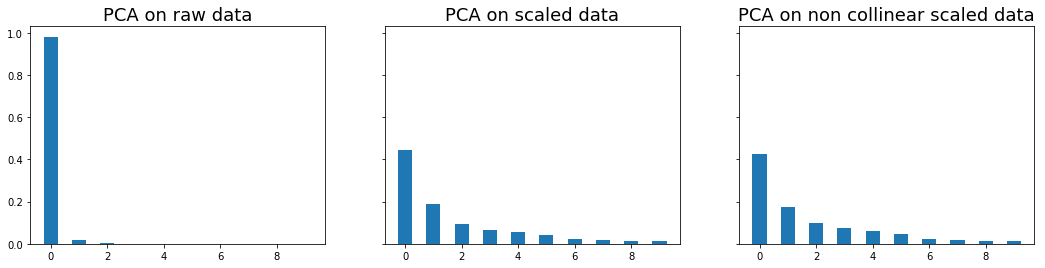

In [74]:
#plotting variance
%matplotlib inline
fig, ax=plt.subplots(1,3, sharey=True, figsize=(18,4))
r1=ax[0].bar(index,df['raw'],width=0.5, align='center')
ax[0].set_title('PCA on raw data',fontsize=18)

r1=ax[1].bar(index,df['scaled'],width=0.5, align='center')
ax[1].set_title('PCA on scaled data',fontsize=18)


r1=ax[2].bar(index,df['scale_non_col'],width=0.5, align='center')
ax[2].set_title('PCA on non collinear scaled data',fontsize=18)

In [76]:
#deciding on the best model kNN, logistics,support vector classifier(svc)

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns

In [77]:
bcan=pd.read_csv(r"data.csv")

In [82]:
bcan.head()
pcan=bcan.iloc[:,2:32]
bcan.iloc[:,2:32].describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [86]:
bd=pd.get_dummies(bcan.diagnosis)
ym=bd.M
ym.head()

0    1
1    1
2    1
3    1
4    1
Name: M, dtype: uint8

In [89]:
#standardizing and PCA
scal=StandardScaler()
pcan_scaled=scal.fit_transform(pcan)
pcan_scaled=pd.DataFrame(pcan_scaled)
ppcan=pcan_scaled.drop(pcan_scaled.columns[[2,3,22,23,12,13]], axis=1)
pca=PCA(n_components=0.95)
pcan_pca=pca.fit_transform(ppcan)
print(pcan_pca.shape)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

(569, 11)
[0.42661046 0.15932139 0.10294428 0.07788731 0.06489774 0.05015242
 0.02145044 0.0187846  0.01505759 0.01197751 0.01117206]
0.9602558201892891


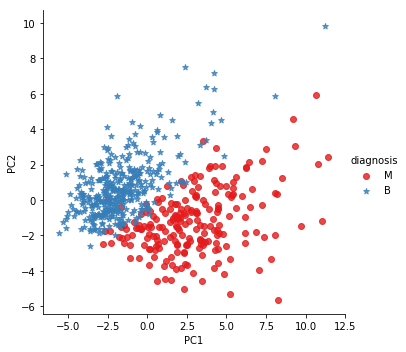

In [104]:
n=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','diagnosis']
bcd=bcan.iloc[:,1:2]
xbcan=pd.DataFrame(np.hstack([pcan_pca,bcd.values]),columns=n)
sns.lmplot("PC1","PC2",hue="diagnosis",data=xbcan,fit_reg=False,markers=["o","*"],palette="Set1")
plt.show()

In [109]:
#training and test
from sklearn.model_selection import train_test_split
X=(xbcan.iloc[:,0:11]).values
X_train,X_test,y_train,y_test=train_test_split(X,ym,test_size=0.25,random_state=0)


In [116]:
#kNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
knn=KNeighborsClassifier()

[0.924 0.874 0.937 0.924 0.943 0.925 0.925 0.912 0.918 0.906 0.906 0.887
 0.9   0.887 0.893 0.874 0.893 0.868 0.887 0.868 0.887 0.875 0.887 0.875
 0.881 0.874 0.893 0.862 0.862 0.856 0.875 0.855 0.862 0.855 0.862 0.849
 0.862 0.843 0.85  0.843 0.843 0.83  0.837 0.83  0.843 0.83  0.837 0.837
 0.837]


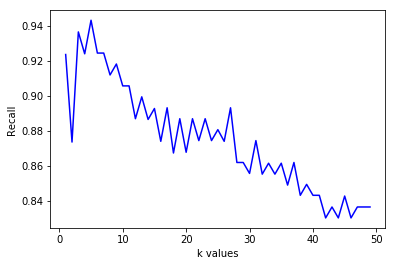

In [118]:
k_range=list(range(1,50))
k_scores=[]
for k in k_range:
        knn=KNeighborsClassifier(n_neighbors=k)
        scores=cross_val_score(knn,X_train,y_train,cv=10,scoring='recall')
        k_scores.append(scores.mean())
print(np.round(k_scores,3))
from matplotlib import pyplot as plt
plt.plot(k_range,k_scores,color='blue')
plt.xlabel('k values')
plt.ylabel('Recall')
plt.show()

In [119]:
#use grid search for accuracy, tuning hyper parameters for accuracy


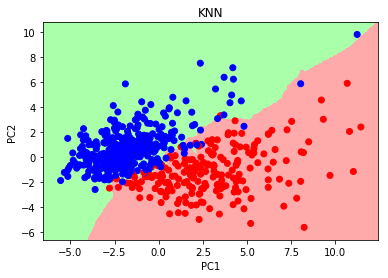

In [127]:
# fitting the optimal model (i.e. knn with k=5 based upon recall score) onto the training data
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# for display purposes, we fit the model on the first two components i.e. PC1, and PC2
knn.fit(X_train[:,0:2], y_train)
# Plotting the decision boundary for all data (both train and test)
# Create color maps
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#AAFFAA','#FFAAAA'])
cmap_bold = ListedColormap(['#0000FF','#FF0000'])
# creating a meshgrid
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h=0.05
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
xy_mesh=np.c_[xx.ravel(), yy.ravel()]
Z = knn.predict(xy_mesh)
%matplotlib inline
Z = Z.reshape(xx.shape)
#print(Z)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
ax=plt.scatter(X[:, 0], X[:, 1], c=ym, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max());plt.ylim(yy.min(), yy.max())
plt.xlabel('PC1');plt.ylabel('PC2')
plt.title('KNN')
plt.show()

KNN:
 confusion matrix
 [[89  1]
 [ 5 48]] 


Confusion matrix plot of KNN classifier


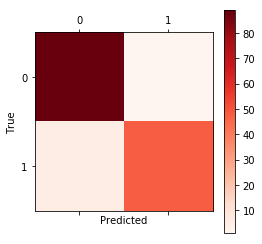


 Classification report 
               precision    recall  f1-score   support

           0       0.95      0.99      0.97        90
           1       0.98      0.91      0.94        53

   micro avg       0.96      0.96      0.96       143
   macro avg       0.96      0.95      0.95       143
weighted avg       0.96      0.96      0.96       143

#############################################################################


In [128]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# KNN
# fitting the knn model on the training data
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn =knn.predict(X_test)
# computing and plotting confusion matrix
c_m = confusion_matrix(y_test, y_pred_knn)
print('KNN:\n confusion matrix\n', c_m,'\n\n')
ax=plt.matshow(c_m,cmap=plt.cm.Reds)
print('Confusion matrix plot of KNN classifier')
plt.colorbar(ax)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
# classification report
print('\n Classification report \n',classification_report(y_test, y_pred_knn))
print ('#############################################################################')